In [26]:
import numpy as np
import pandas as pd 

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("../input/creditcardfraud/creditcard.csv")

print(df.head())
print(df.describe())
print(df.info())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

time variable 


Text(0, 0.5, 'Transactions')

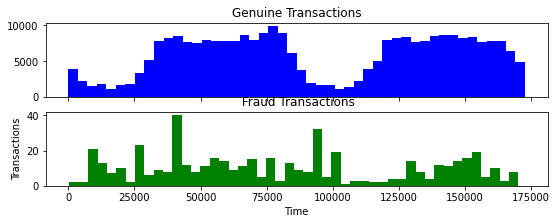

In [28]:
print("time variable ")
fig , (ax1,ax2) = plt.subplots(2,1,sharex = True ,figsize = (9,3))
ax1.hist(df.Time[df.Class==0],bins = 48,color = "b",alpha = 1)
ax1.set_title('Genuine Transactions')
ax2.hist(df.Time[df.Class==1],bins = 48,color = "g",alpha = 1)
ax2.set_title(' Fraud Transactions')
plt.xlabel("Time")
plt.ylabel("Transactions")

Text(0, 0.5, 'Transactions')

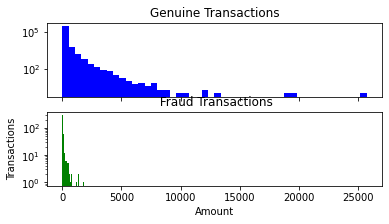

In [29]:
fig , (ax3,ax4) = plt.subplots(2,1,sharex = True ,figsize = (6,3))
ax3.hist(df.Amount[df.Class==0],bins = 48,color = "b",alpha = 1)
ax3.set_title('Genuine Transactions')
ax3.set_yscale('log')
ax4.hist(df.Amount[df.Class==1],bins = 48,color = "g",alpha = 1)
ax4.set_title(' Fraud Transactions')
ax4.set_yscale('log')
plt.xlabel("Amount")
plt.ylabel("Transactions")

(0.0, 2000.0)

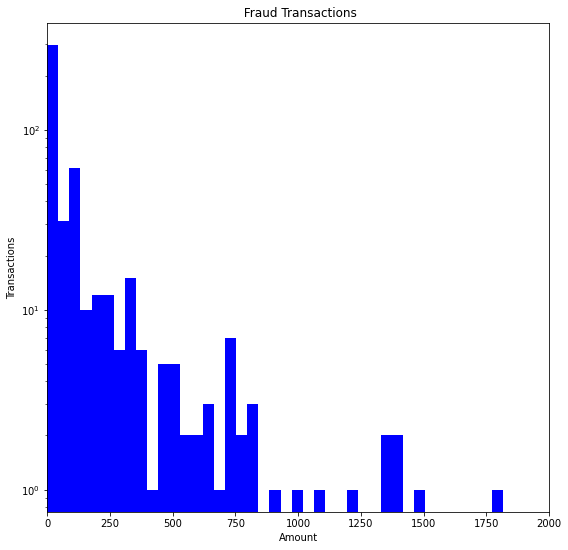

In [30]:
fig , (ax5) = plt.subplots(1,1,sharex = True ,figsize = (9,9))
ax5.hist(df.Amount[df.Class==1],bins = 48,color = "b",alpha = 1)
ax5.set_title(' Fraud Transactions')
ax5.set_yscale('log')
plt.xlabel("Amount")
plt.ylabel("Transactions")
plt.xlim(0,2000,4000,6000)

In [31]:
from sklearn.preprocessing import  StandardScaler
df["Standard_Amount"]= StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis = 1)
print(df['Standard_Amount'].shape)

(284807,)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

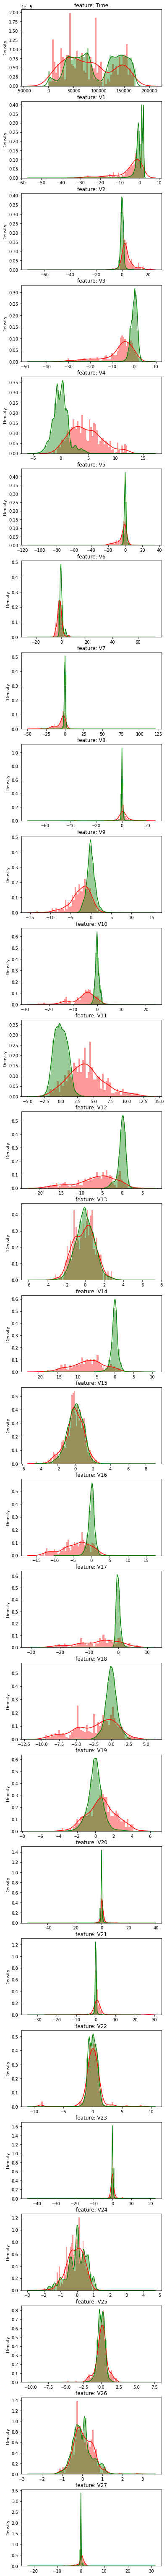

In [32]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
y = df['Class'].values
X = df.drop(['Class'],axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,auc,roc_auc_score,confusion_matrix,recall_score,precision_score,accuracy_score
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_prob_pred = model.predict_proba(X_test)

In [35]:
def print_scores(y_test,y_pred,y_prob_pred):
    print('confusion matrix \n',confusion_matrix(y_test,y_pred))
    print('recall score\n',recall_score(y_test,y_pred))
    print('precision score\n', precision_score(y_test,y_pred))
    print('f1 score\n',f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_prob_pred[:,1])))

In [36]:
print_scores(y_test,y_pred,y_prob_pred)

confusion matrix 
 [[56473   391]
 [   33    65]]
recall score
 0.6632653061224489
precision score
 0.1425438596491228
f1 score
 0.2346570397111913
accuracy score:  0.992556441136196
ROC AUC: 0.9679048937385871


Text(91.68, 0.5, 'true value')

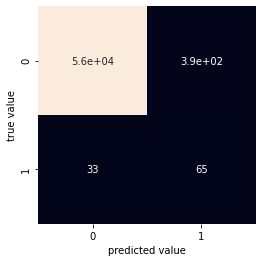

In [37]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),square = True,annot = True,cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [38]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
y_prob_pred2 = model2.predict_proba(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
print_scores(y_test,y_pred2,y_prob_pred2)

confusion matrix 
 [[56835    29]
 [   26    72]]
recall score
 0.7346938775510204
precision score
 0.7128712871287128
f1 score
 0.7236180904522613
accuracy score:  0.9990344440153085
ROC AUC: 0.9494445393520379


Text(91.68, 0.5, 'True value')

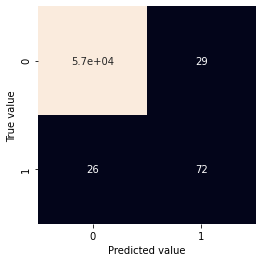

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot = True,square=True,cbar = False)
plt.xlabel('Predicted value')
plt.ylabel('True value')

Recall score in naive bayes is 0.6632
Recall score in logistic regression is 0.7346
Clearly , Logistic regression quantifies more number of correct positive predictions made out of all positive predictions than naive bayes predictions.